Allison Forte

February 24, 2023

DSC 550

Exercise 11.2

# Building a CNN Image Classifier
Build a convolutional neural network (CNN) to classify handwritten digits from the MNIST dataset. 

The steps to build a CNN classifier are outlined in section 20.15 of the Machine Learning with Python Cookbook, but keep in mind that your code may need to be modified depending on your version of Keras.

1. Load the MNIST data set.
2. Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.
3. Build and train a Keras CNN classifier on the MNIST training set.
4. Report the test accuracy of your model.
5. Display a confusion matrix on the test set classifications.
6. Summarize your results.

In [16]:
# Load the MNIST data set 
import keras
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

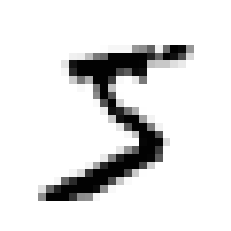

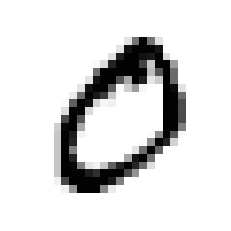

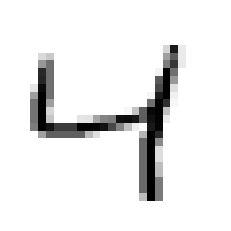

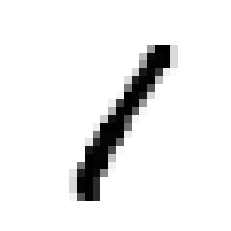

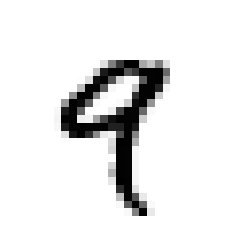

Training labels are: [5 0 4 1 9]


In [17]:
# Display the first five images in the training data set 
#(see section 8.1 in the Machine Learning with Python Cookbook). 

from matplotlib import pyplot as plt
for i in range(5):
    img = train_X[i].reshape((28,28))
    plt.imshow(img, cmap="Greys"), plt.axis('off')
    plt.show()
    
    
# Compare these to the first five training labels.

print('Training labels are:', train_y[0:5])

By comparing the first 5 images to the first 5 labels we can see that the labels match the images. 

In [24]:
# Build and train a Keras CNN classifier on the MNIST training set.

import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
import tensorflow as tf
from keras.utils import np_utils


# Set that color channel  will  be first
k.set_image_data_format('channels_first')

np.random.seed(0)


# Set image info
channels  = 1
height = 28
width  = 28


# Reshape data
train_X = train_X.reshape(train_X.shape[0], channels, height, width)
test_X = test_X.reshape(test_X.shape[0], channels, height, width)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')


# Rescale pixel intensity

train_X /= 255
test_X /= 255


# Convert labels to categories
train_y = np_utils.to_categorical(train_y, 10)
test_y = np_utils.to_categorical(test_y, 10)
number_of_classes = test_y.shape[1]


In [25]:
# start model
model = Sequential()


# add layers
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(1,28,28)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [26]:
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 26, 26)        320       
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 24, 24)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 12, 12)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 32, 12, 12)        0         
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               589952    
                                                      

In [28]:
# fit the model with the training data
model.fit(train_X, train_y, 
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10


ValueError: in user code:

    File "/Users/allison.forte/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/Users/allison.forte/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/allison.forte/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/Users/allison.forte/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/allison.forte/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/Users/allison.forte/opt/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/allison.forte/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/allison.forte/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/allison.forte/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/allison.forte/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 10, 10) and (32, 10) are incompatible


In [ ]:
# Report the test accuracy of your model.

score = model.evaluate(test_X, test_y, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

In [ ]:
# Display a confusion matrix on the test set classifications.

test_predictions = model.predict(test_X)

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_true = test_y, y_pred = test_predictions)

matrix

Summarize your results.

This model is not working properly with the input data. For a reason I have yet to identify, the shapes of the data are incompatible when attempting to train the model on the training data.